In [ ]:
import pandas as pd          # For data manipulation and analysis
import numpy as np          # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.naive_bayes import GaussianNB           # The Naive Bayes classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation
import seaborn as sns       # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

In [ ]:
df = pd.read_csv('./sample_data/data.csv')
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (569, 33)

Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst             

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
features_to_drop = ['id']
if 'Unnamed: 32' in df.columns:
    features_to_drop.append('Unnamed: 32')
df = df.drop(features_to_drop, axis=1)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']               # Target variable

In [ ]:
X_train_initial, X_test, y_train_initial, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_initial_scaled = scaler.fit_transform(X_train_initial)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\nClass Distribution in Training Set:")
print(y_train_initial.value_counts(normalize=True))


Class Distribution in Training Set:
diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_initial_scaled, y_train_initial,
    test_size=0.2, random_state=42, stratify=y_train_initial
)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_val_pred = nb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation Accuracy:", round(val_accuracy * 100, 2), "%")


Validation Accuracy: 95.0 %


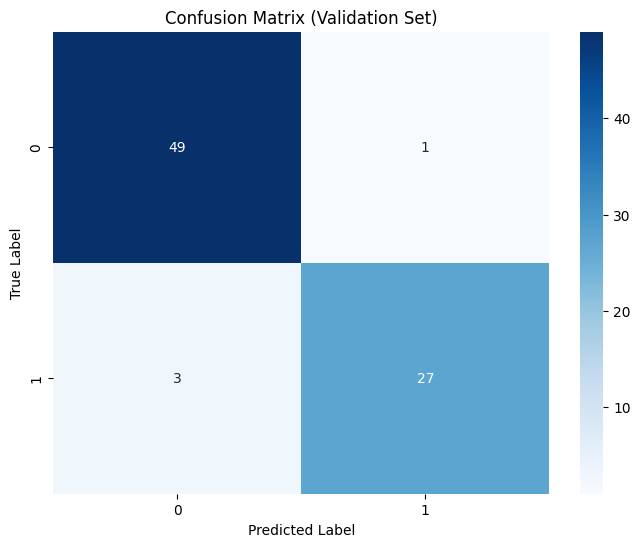

In [ ]:
val_cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
y_test_pred = nb_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Set Accuracy:", round(test_accuracy * 100, 2), "%")


Test Set Accuracy: 94.15 %


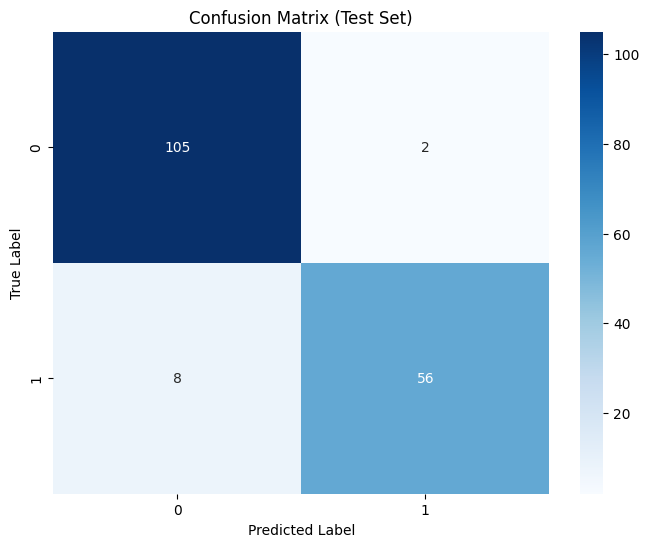

In [ ]:
# Display test set confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# The following code segment can be used for tets this model for an inseen data
# First, save the trained model
import joblib

# Save the model and scaler
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Function to preprocess new data and make predictions
def predict_breast_cancer(new_data):
    """
    Make predictions on new unseen data.

    Parameters:
    new_data (pd.DataFrame): DataFrame containing new patient data

    Returns:
    dict: Dictionary containing prediction and probability
    """
    # Load the saved model and scaler
    loaded_model = joblib.load('naive_bayes_model.pkl')
    loaded_scaler = joblib.load('scaler.pkl')

    # Ensure the new data has the same features as training data
    required_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                        'smoothness_mean', 'compactness_mean', 'concavity_mean',
                        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                        'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                        'smoothness_se', 'compactness_se', 'concavity_se',
                        'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                        'smoothness_worst', 'compactness_worst', 'concavity_worst',
                        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

    # Check if all required features are present
    missing_features = set(required_features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"Missing features: {missing_features}")

    # Select and order features correctly
    new_data = new_data[required_features]

    # Scale the features
    scaled_data = loaded_scaler.transform(new_data)

    # Make prediction
    prediction = loaded_model.predict(scaled_data)
    prediction_proba = loaded_model.predict_proba(scaled_data)

    # Create results dictionary
    results = {
        'prediction': 'Malignant' if prediction[0] == 1 else 'Benign',
        'prediction_probability': {
            'Benign': round(prediction_proba[0][0] * 100, 2),
            'Malignant': round(prediction_proba[0][1] * 100, 2)
        }
    }

    return results

# Example usage with new data
# Here's how to use the function with new patient data:

# Example 1: Single patient data
new_patient_data = pd.DataFrame({
    'radius_mean': [17.99],
    'texture_mean': [10.38],
    'perimeter_mean': [122.8],
    'area_mean': [1001.0],
    'smoothness_mean': [0.1184],
    'compactness_mean': [0.2776],
    'concavity_mean': [0.3001],
    'concave points_mean': [0.1471],
    'symmetry_mean': [0.2419],
    'fractal_dimension_mean': [0.07871],
    'radius_se': [1.095],
    'texture_se': [0.9053],
    'perimeter_se': [8.589],
    'area_se': [153.4],
    'smoothness_se': [0.006399],
    'compactness_se': [0.04904],
    'concavity_se': [0.05373],
    'concave points_se': [0.01587],
    'symmetry_se': [0.03003],
    'fractal_dimension_se': [0.006193],
    'radius_worst': [25.38],
    'texture_worst': [17.33],
    'perimeter_worst': [184.6],
    'area_worst': [2019.0],
    'smoothness_worst': [0.1622],
    'compactness_worst': [0.6656],
    'concavity_worst': [0.7119],
    'concave points_worst': [0.2654],
    'symmetry_worst': [0.4601],
    'fractal_dimension_worst': [0.1189]
})

# Make prediction
result = predict_breast_cancer(new_patient_data)
print("\nPrediction Results:")
print(f"Diagnosis: {result['prediction']}")
print("\nProbability Distribution:")
print(f"Benign: {result['prediction_probability']['Benign']}%")
print(f"Malignant: {result['prediction_probability']['Malignant']}%")

# Example 2: Multiple patients (batch prediction)
def batch_predict(data_path):
    """
    Make predictions on multiple patients from a CSV file.

    Parameters:
    data_path (str): Path to CSV file containing patient data

    Returns:
    pd.DataFrame: DataFrame with original data and predictions
    """
    # Load the data
    batch_data = pd.read_csv(data_path)

    # Make predictions
    predictions = []
    probabilities_benign = []
    probabilities_malignant = []

    for idx, row in batch_data.iterrows():
        result = predict_breast_cancer(pd.DataFrame([row]))
        predictions.append(result['prediction'])
        probabilities_benign.append(result['prediction_probability']['Benign'])
        probabilities_malignant.append(result['prediction_probability']['Malignant'])

    # Add predictions to the original data
    batch_data['Predicted_Diagnosis'] = predictions
    batch_data['Probability_Benign'] = probabilities_benign
    batch_data['Probability_Malignant'] = probabilities_malignant

    return batch_data

# Example usage for batch prediction:
# results_df = batch_predict('path_to_new_patients.csv')
# print(results_df[['Predicted_Diagnosis', 'Probability_Benign', 'Probability_Malignant']])


Prediction Results:
Diagnosis: Malignant

Probability Distribution:
Benign: 0.0%
Malignant: 100.0%
